# Solar Flare Energy Prediction

# Initial Data processing steps 

The initial steps taken in the preprocessing are as follows - 
1. The dataset was taken from NASA RHESSI Data [repository](https://hesperia.gsfc.nasa.gov/rhessi_data_search/rhessi_data_search_vme.html) accessed through a web form.  
2. The initial format of files was FITS. This was converted to CSV by using tools provided [here](https://fits.gsfc.nasa.gov/fits_viewer.html).
3. The many csv files generated from the FITS files were concatenated to make the current dataset in the [repository](https://github.com/Byte7/Solar-Flares-RHESSI-Mission/tree/master/data). [This](https://github.com/Byte7/Solar-Flares-RHESSI-Mission/tree/master/Join_script) script was used for the same.

# Some background into the RHESSI Solar Flare Dataset

The Sun is the most important start to the planet Earth. Not just because it is the nearest star, but because it is the essence of all the life on planet Earth.  

The Sun has a distinct activity that can affect life on earth on a very massive scale, called ** Solar Flare**. As per wikipedia and the internet, a solar flare is a sudden flash of increased Sun's brightness, usually observed near its surface. Flares are often, but not always, accompanied by a coronal mass ejection. 

Solar flares produce high energy particles and radiation that are dangerous to living organisms. However, at the surface of the Earth we are well protected from the effects of solar flares and other solar activity by the Earth's magnetic field and atmosphere.  

There are many organizations working on monitoring the Sun activities( one of them the flares activity ). These organizations have an amazing resources. One of them is the Reuven Ramaty High Energy Solar Spectroscopic Imager which is NASA solar flare observatory (RHESSI) and they are trying to predict the Sun flares and the active region using their amazing computing machines and of course extraordinary staff .

# Dataset Metadata and General Description 

In [ ]:
'''
Flare - Numeric - An ID number, ymmddnn, e.g., 2042101 is the first flare found for 21-Apr-2002. 
        These numbers are not time ordered.
Start.date - DateTime - The date when the flare occurred
Start.time - DateTime - Flare start time
Peak -DateTime - Flare peak time
End - String - Flare end time
Dur[s] - Numeric - Duration of flare in seconds
Peak[c/s] - Numeric - Peak count rate in corrected counts, peak counts/second
Total Counts - Numeric -  Total of counts in corrected counts, counts in energy range
Energy [keV] - String - The highest energy band in which the flare was observed.
X pos [asec] -  Numeric -  Flare position in arcsec from sun center
Y pos [asec] - Numeric -  Flare position in arcsec from sun center
Radial [asec] - Radial distance in arcsec from sun center
active.region.ar - String - No Description
flag.1 - String - No Description
flag.2 - String - No Description
flag.3 - String - No Description
flag.4 -  String - No Description
flag.5 -  String - No Description

###################### Flags - Quality Codes ######################
    Flare Flag Codes:
    List item
        a0 - In attenuator state 0 (None) sometime during flare
        a1 - In attenuator state 1 (Thin) sometime during flare
        a2 - In attenuator state 2 (Thick) sometime during flare
        a3 - In attenuator state 3 (Both) sometime during flare
        An - Attenuator state (0=None, 1=Thin, 2=Thick, 3=Both) at peak of flare
        DF - Front segment counts were decimated sometime during flare
        DR - Rear segment counts were decimated sometime during flare
        ED - Spacecraft eclipse (night) sometime during flare
        EE - Flare ended in spacecraft eclipse (night)
        ES - Flare started in spacecraft eclipse (night)
        FE - Flare ongoing at end of file
        FR - In Fast Rate Mode
        FS - Flare ongoing at start of file
        GD - Data gap during flare
        GE - Flare ended in data gap
        GS - Flare started in data gap
        MR - Spacecraft in high-latitude zone during flare
        NS - Non-solar event
        PE - Particle event: Particles are present
        PS - Possible Solar Flare; in front detectors, but no position
        Pn - Position Quality: P0 = Position is NOT valid, P1 = Position is valid
        Qn - Data Quality: Q0 = Highest Quality, Q11 = Lowest Quality
        SD - Spacecraft was in SAA sometime during flare
        SE - Flare ended when spacecraft was in SAA
        SS - Flare started when spacecraft was in SAA

'''

In [1]:
# To display plots and figures inline 
%matplotlib inline          

# To ensure python2 and python3 compatability
from __future__ import division, print_function        

# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Setting plot display parameters 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 9)
sns.set_style('darkgrid')

# Suppress warnings display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset and displaying a few records
df = pd.read_csv('data/hessi.solar.flare.2002to2016.csv',sep=",")
df.head(3)

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN


In [3]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113942 entries, 0 to 113941
Data columns (total 18 columns):
flare               113942 non-null int64
start.date          113942 non-null object
start.time          113942 non-null object
peak                113942 non-null object
end                 113942 non-null object
duration.s          113942 non-null int64
peak.c/s            113942 non-null int64
total.counts        113942 non-null int64
energy.kev          113942 non-null object
x.pos.asec          113942 non-null int64
y.pos.asec          113942 non-null int64
radial              113942 non-null int64
active.region.ar    113942 non-null int64
flag.1              113942 non-null object
flag.2              113942 non-null object
flag.3              94035 non-null object
flag.4              93740 non-null object
flag.5              52991 non-null object
dtypes: int64(8), object(10)
memory usage: 15.6+ MB


In [4]:
df.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar
count,1.139420e+05,113942.000000,113942.000000,1.139420e+05,113942.000000,113942.000000,113942.000000,113942.000000
mean,1.086459e+07,493.051728,212.321532,3.772013e+05,-9.752181,-43.129812,689.528892,979.922926
std,9.832864e+06,433.389295,833.776871,3.071203e+06,757.017401,404.547666,513.203089,1350.484625
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000
25%,4.110734e+06,212.000000,28.000000,2.292000e+04,-704.000000,-249.000000,469.000000,0.000000
50%,1.112022e+07,364.000000,53.000000,5.857400e+04,0.000000,-75.000000,759.000000,687.000000
75%,1.403013e+07,628.000000,144.000000,1.794420e+05,706.000000,198.000000,946.000000,1543.000000
max,1.412161e+08,4444.000000,113156.000000,4.355501e+08,1002.000000,1012.000000,14154.000000,9999.000000


In [5]:
# Checking null values
df.isnull().any()

flare               False
start.date          False
start.time          False
peak                False
end                 False
duration.s          False
peak.c/s            False
total.counts        False
energy.kev          False
x.pos.asec          False
y.pos.asec          False
radial              False
active.region.ar    False
flag.1              False
flag.2              False
flag.3               True
flag.4               True
flag.5               True
dtype: bool

In [6]:
# Counting null values
df.isnull().sum()

flare                   0
start.date              0
start.time              0
peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              60951
dtype: int64

In [7]:
# Making flare ID as index and parsing dates
new_df = pd.read_csv('data/hessi.solar.flare.2002to2016.csv',sep=",", index_col=0)

# process date / time columns
def parse_date(sdatex,stimex):
    datex = datetime.strptime(sdatex, '%Y-%m-%d')
    timex = datetime.strptime(stimex, '%H:%M:%S')
    return datetime(datex.year,datex.month,datex.day,timex.hour,timex.minute,timex.second)

# Adding year, month, day, start date, peak date, end date and dropping earlier columns
new_df['dt.start'] = new_df[['start.date','start.time']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.peak'] = new_df[['start.date','peak']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.end'] = new_df[['start.date','end']].apply(lambda x: parse_date(x[0],x[1]), axis=1)

# clean columns
new_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)

# add new columns
new_df['year'] = new_df['dt.start'].apply(lambda col: col.year)
new_df['month'] = new_df['dt.start'].apply(lambda col: col.month)
new_df['day'] = new_df['dt.start'].apply(lambda col: col.day)

In [8]:
# Displaying current columns of dataframe
new_df.columns

Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'active.region.ar', 'flag.1', 'flag.2',
       'flag.3', 'flag.4', 'flag.5', 'dt.start', 'dt.peak', 'dt.end', 'year',
       'month', 'day'],
      dtype='object')

In [9]:
# Renaming columns with better names 
new_df = new_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'_flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})

In [10]:
# Display new processed dataframe
new_df.head(3)

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,flag_2,flag_3,flag_4,_flag_5,date_start,date_peak,date_end,year,month,day
flare,,,,,,,,,,,,,,,,,,,
2021213,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
2021228,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2021332,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13


In [11]:
# Grouping Data wrt. to year, month and as a function of energy values
DATA_by_yr = new_df.groupby(['year'])['total_counts'].sum()
DATA_by_month = new_df.groupby(['month'])['total_counts'].sum().sort_values(ascending=False)
DATA_vs_energy = new_df.groupby(['energy_kev'])['energy_kev'].count().sort_values(ascending=True)

In [12]:
'''Selecting 1000 rows and 4 coulmns from new dataframe for plots
    and finding value distribution and relation'''
data_part = new_df.iloc[1:1000, 0:4]

In [13]:
# Display column names for data part
data_part.columns

Index(['duration_s', 'peak_c_s', 'total_counts', 'energy_kev'], dtype='object')

## Relation between Flare duration, Peak count rate and Total count with respect to Energy

Majority of the flares are of the energy range 6-12 KeV. Another small majority of flares are of range 12-25 KeV. Flares having energies greater than range 25-50 KeV are very sparse and rare in occurrence.

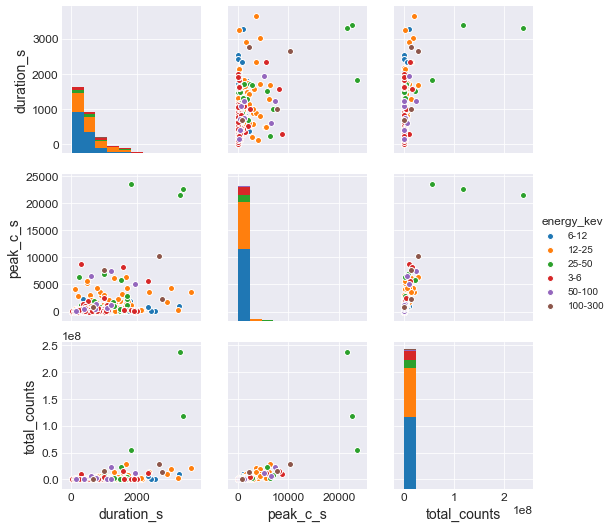

In [14]:
sns.pairplot(data=data_part, hue='energy_kev', vars=['duration_s', 'peak_c_s', 'total_counts'])

## Density plot to visualize the distribution of the Flare wrt. Energy

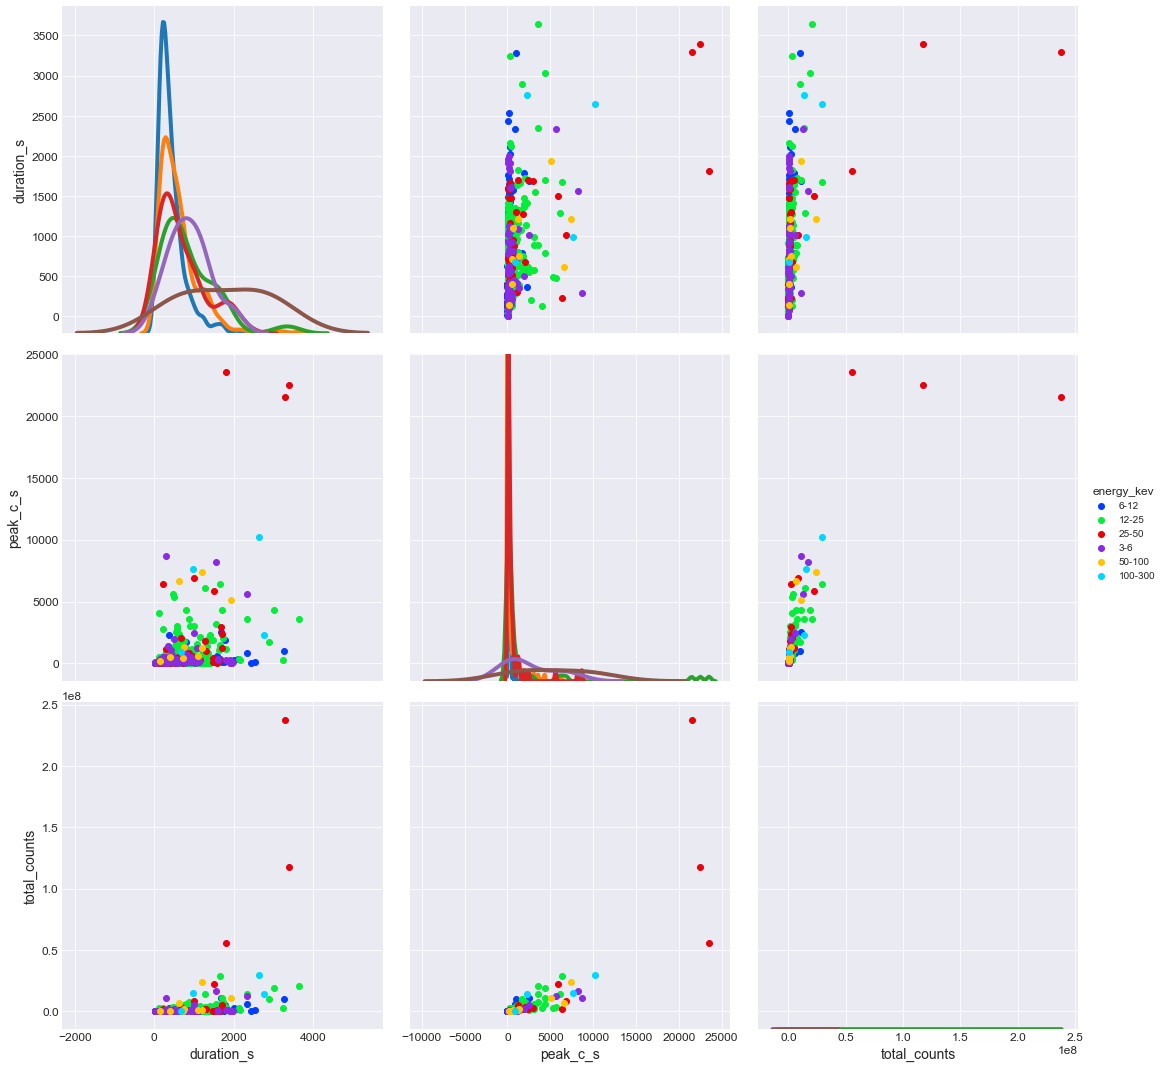

In [15]:
g =  sns.PairGrid(data_part, hue='energy_kev', palette='bright', size=5)

def f(x, **kwargs):
    kwargs.pop("color")
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    sns.kdeplot(x, color=col, **kwargs, linewidth=4)

g.map_diag(f)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

## Countplot to Visualize distribution of flares in the different energy ranges

The countplot visualizes the distribution of flares from the data_part dataframe(having 1000 rows of the entire dataset). We see that the 6-12 KeV energy range dominates all the other value range. We assume the same trend continues for the entire dataset.

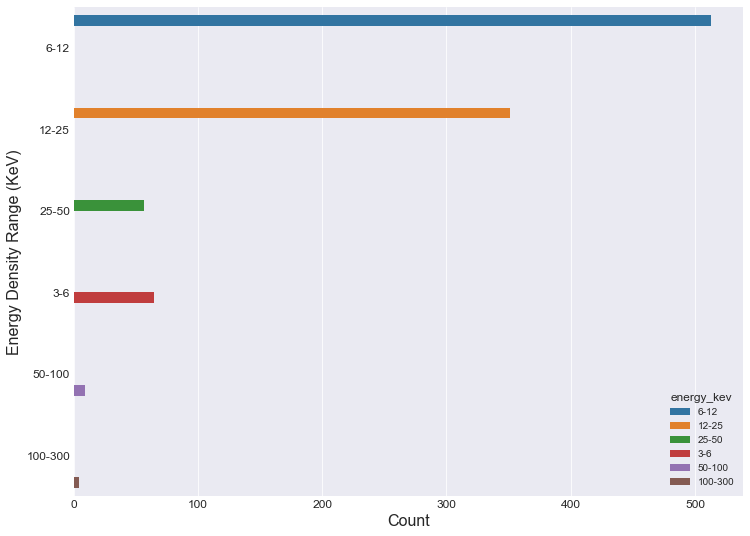

In [16]:
sns.countplot(y='energy_kev', data=data_part, hue='energy_kev')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Energy Density Range (KeV)', fontsize=16)

### Countplot on the entire dataset to verify assumption

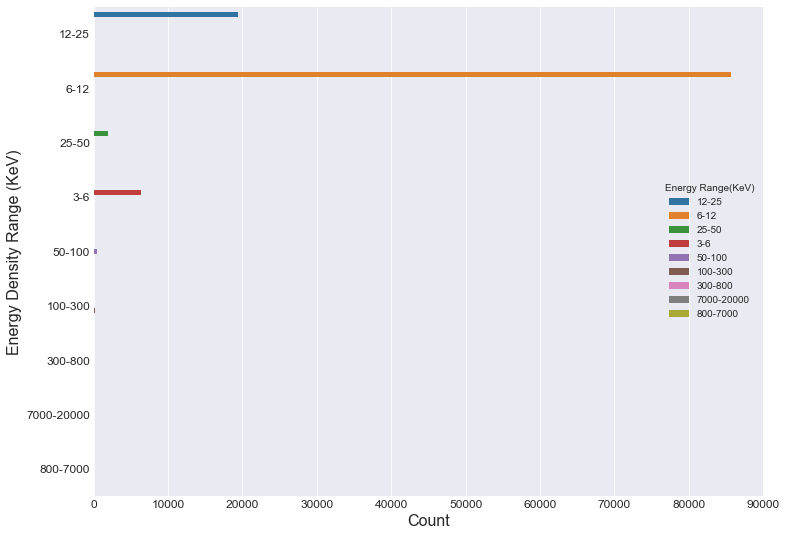

In [17]:
sns.countplot(y='energy_kev', data=new_df, hue='energy_kev')
plt.legend(title='Energy Range(KeV)', loc='right', prop={'size': 10})
plt.xlabel('Count', fontsize=16)
plt.ylabel('Energy Density Range (KeV)', fontsize=16)

We hence confirm our assumption by plotting a countplot on the entire dataset. A majority of flares appear in the energy range of 6-12 KeV, followed by the 12-25 KeV range.

## Relation between Energy density and Duration(in seconds)

The plot uses only thousand rows(data_part dataframe). We infer that short duration pulses are having high energy density.

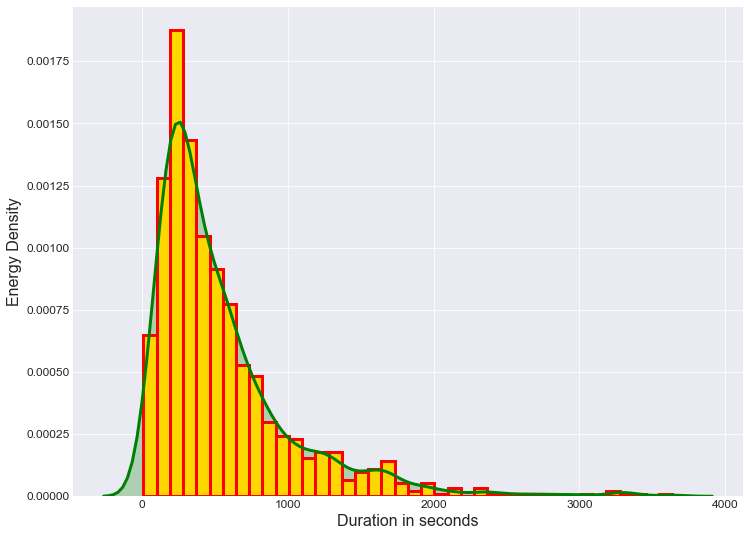

In [18]:
sns.distplot(data_part['duration_s'], kde_kws=dict(color='green', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'gold', edgecolor='red', lw=3))
plt.xlabel('Duration in seconds', fontsize=16)
plt.ylabel('Energy Density', fontsize=16)

## Histogram and Density Curve of Flare Duration

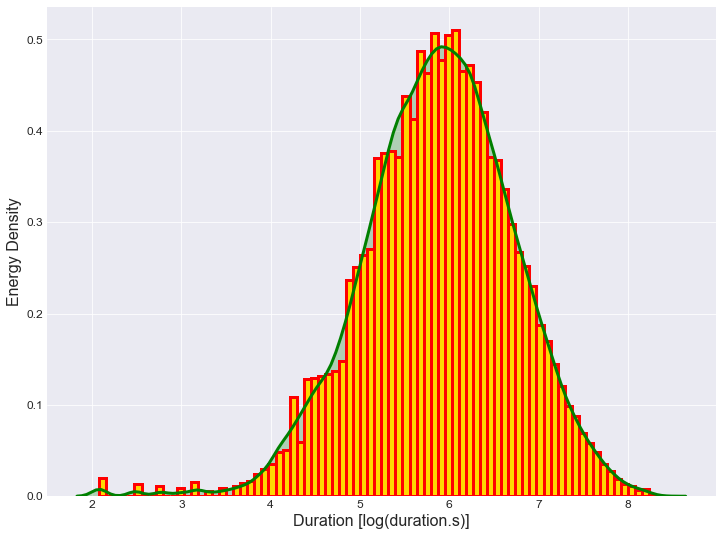

In [19]:
df['duration_s_log'] = np.log(df['duration.s'])
sns.distplot(df['duration_s_log'], bins=80, kde_kws=dict(color='green', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'gold',edgecolor='red', lw=3))
plt.xlabel('Duration [log(duration.s)]', fontsize=16)
plt.ylabel('Energy Density', fontsize=16)

## Relation between Radial values and the total count of flares

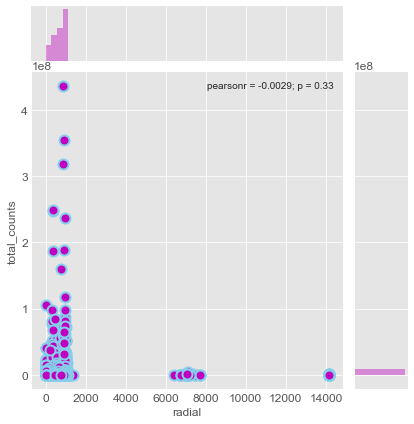

In [20]:
plt.style.use('ggplot')
sns.jointplot(x=new_df['radial'], y=new_df['total_counts'], color='m', kind='scatter', s=100, edgecolor="skyblue", linewidth=2)

## Relation between Duration and log(count of flare)

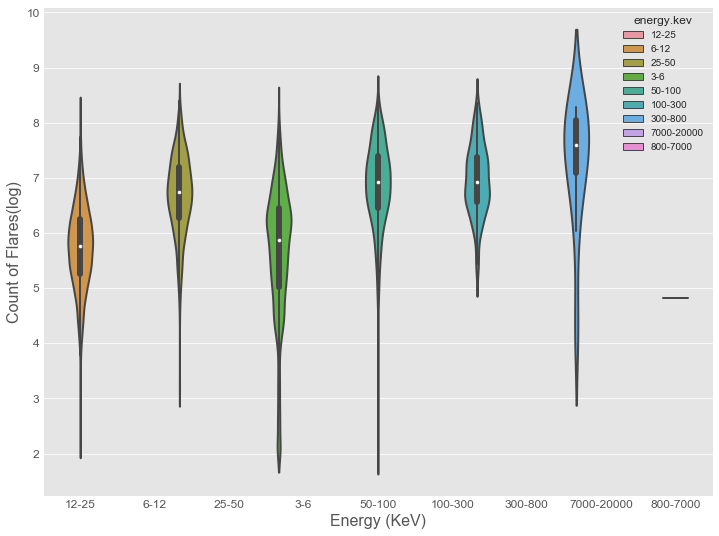

In [21]:
df['flare_log'] = np.log(df['duration.s'])
sns.violinplot(x=df['energy.kev'], y=df['flare_log'], width=3, linewidth=2, hue=df['energy.kev'])
plt.ylabel('Count of Flares(log)', fontsize=16)
plt.xlabel('Energy (KeV)', fontsize=16)

## Distribution of flares over time duration (in seconds) wrt. Energies

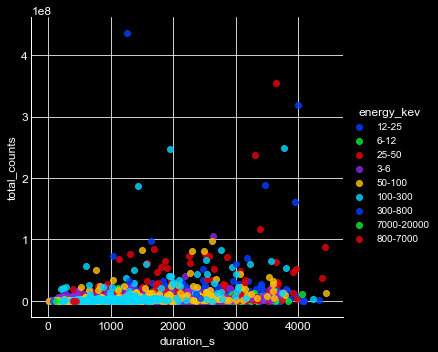

In [22]:
plt.style.use('dark_background')
sns.lmplot(x='duration_s', y='total_counts', hue='energy_kev', fit_reg=False, legend=True, data=new_df, palette='bright')

## Solar Flares trend over the Years (2002-2016)

The solar flares activity per year is very important to see the flares trend.

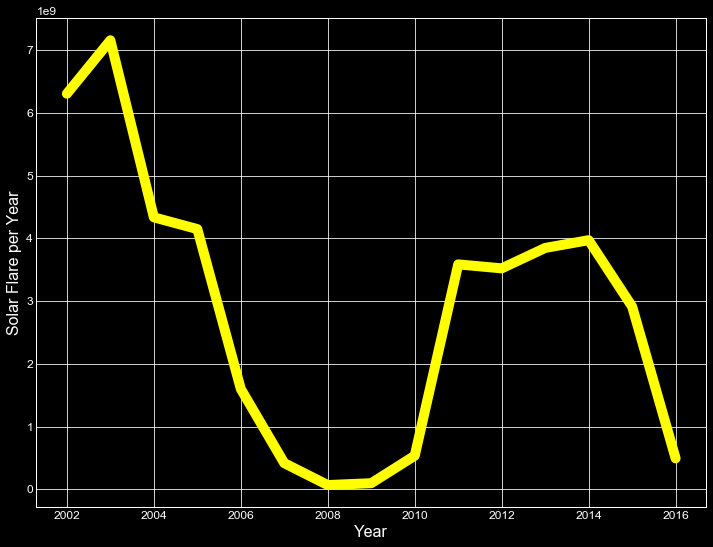

In [24]:
plt.style.use('dark_background')
plt.plot(DATA_by_yr, 'yellow', linewidth=10)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Solar Flare per Year', fontsize=16)

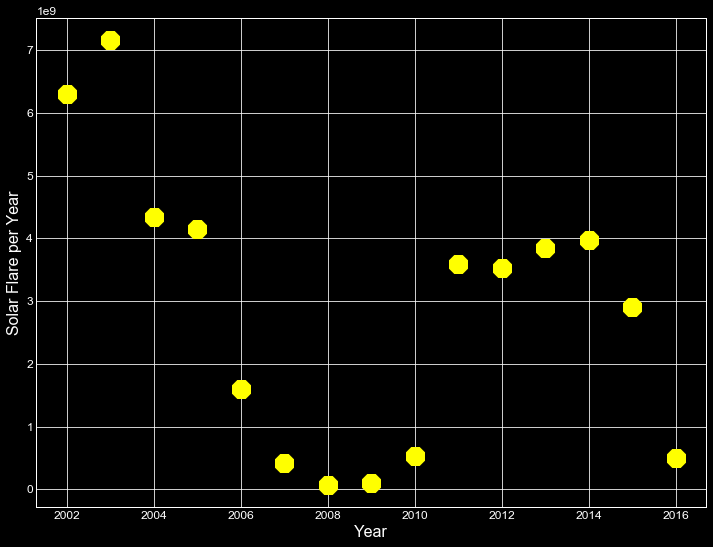

In [23]:
plt.style.use('dark_background')
plt.plot(DATA_by_yr, '8', color='yellow', markersize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Solar Flare per Year', fontsize=16)

# Sunspots - Mapping Flares on the Sun

## Filtering data - removing flares having attributes null or NaN values

In [25]:
'''Filtering data based on the energy range 3-6 KeV, flags and radial values. Filtering possible values 
    which may be wrong or without any solar event '''

def filter_data(DATA,lwrong):
    ## filter 1: 3-6 kev
    lenght1 = len(DATA)
    DATA = DATA[DATA['energy.kev']!='3-6']
    lenght2 = len(DATA)
    if lenght1!=lenght2:
        print('filtering 3-6 kev energy range',lenght1,lenght2)

    ## filter 2: radial
    radial = DATA['radial'].values
    lenght1 = len(DATA)
    DATA = DATA[DATA['radial']<=np.percentile(radial,99)]
    lenght2 = len(DATA)
    if lenght1!=lenght2: 
        print('filtering radial',lenght1,lenght2)

    # filter possible wrong values or without solar event
    #lwrong = ['NS','SD','SS','DF','DR','ED','ES','FE','FR','FS','GD','GE','GS','MR','P0','PS','PE']
    for icod in lwrong: 
        ## filter
        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.1']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.2']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.3']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.4']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        values = DATA['flag.5'].values
        lfilter = [i for i in list(values[pd.notnull(values)]) if icod in i]
        DATA = DATA[~DATA['flag.5'].isin(lfilter)]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)
            
    return DATA

In [26]:
""" Reading dataset and filtering values based on above parameters of the function"""
data = pd.read_csv('data/hessi.solar.flare.2002to2016.csv', sep=',')
# filtering basic
lwrong = ['NS','SD']
filtered_data = filter_data(data,lwrong)

# include energy bounday ranges
filtered_data['energy.kev.i'] = filtered_data['energy.kev'].apply(lambda col: int(col.split('-')[0]))
filtered_data['energy.kev.f'] = filtered_data['energy.kev'].apply(lambda col: int(col.split('-')[1]))
CENERGY = filtered_data[['energy.kev','energy.kev.i','energy.kev.f']].drop_duplicates(inplace=False).sort_values(['energy.kev.i'], ascending=[1], inplace=False)

filtering 3-6 kev energy range 113942 107606
filtering radial 107606 106537
filtering SD 106537 106501
filtering SD 106501 106408


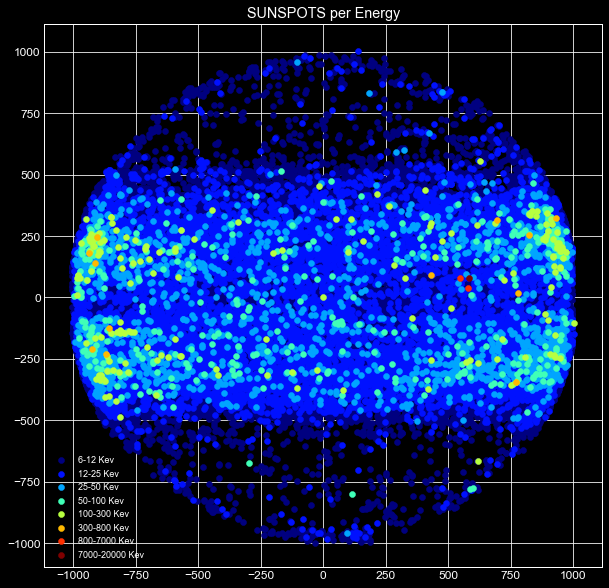

In [27]:
'''Plotting all the Flares from the filtered dataframe'''

colors = plt.cm.jet(np.linspace(0,1,len(CENERGY['energy.kev.i'].values)))

# build figure object
fig, ax = plt.subplots(figsize=(10,10))
# loop over energy ranges
for i,irange in enumerate(CENERGY['energy.kev'].values):
    # collect filtered data in temporary dataset
    AUX_data = filtered_data[filtered_data['energy.kev']==irange][['x.pos.asec','y.pos.asec']]
    # scatter plot to plot flare
    plt.scatter(AUX_data['x.pos.asec'].values,AUX_data['y.pos.asec'].values,color=colors[i],label='%s Kev'%irange)
    ax.legend(loc='best',fontsize=9,shadow=True)
    # delete auxillary/temporary dataset
    del(AUX_data)
# set title to plot
plt.title('SUNSPOTS per Energy')
# plot
plt.show()

We find that most flares are in range 6-12 and 12-25 KeV. The flares having high energy are very little and happen very scarcely.

## Flare position in the Sun arcsec from the center

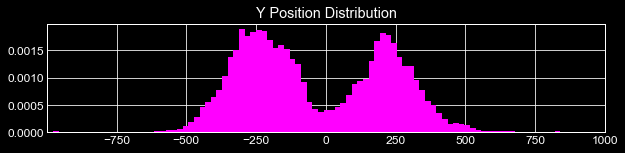

In [28]:
'''Y position distriution arounf the center of the sun'''
fig, ax = plt.subplots(figsize=(10,2))
# hist
y = filtered_data['y.pos.asec'].values
plt.hist(y, bins=np.linspace(np.min(y),np.max(y),100), normed=True, label="label var y", color='magenta')
# set limits
ax.set_xlim([np.min(y),np.max(y)])
# title
plt.title('Y Position Distribution')
# plot
plt.show()

We find that there is a uniform distribution of flares around the center of the Sun. No occurence of flares from a particular region or area of sun.

## Yearly analysis of Flares

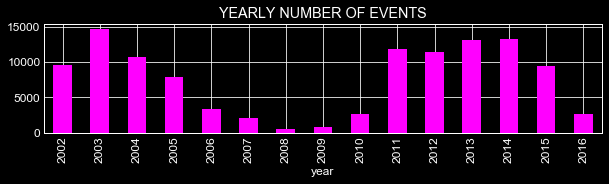

In [29]:
""" Number of events per year """
plt.style.use('dark_background')
new_df.groupby(['year'])['total_counts'].count().plot(kind='bar',figsize=(10,2),title='YEARLY NUMBER OF EVENTS', color='magenta')

## Mapping solar flares intensity over the years

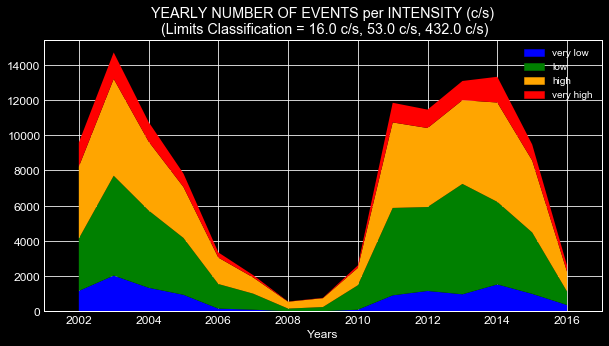

In [30]:
""" Number of events per year and intensity ranges """

# calculate limits of intensity ranges
intensity = new_df['peak_c_s'].values
p10 = np.percentile(intensity,10)
p50 = np.percentile(intensity,50)
p90 = np.percentile(intensity,90)

# plot average of events intensity per year
PI0 = new_df[(new_df['peak_c_s']<=p10)].groupby(['year'])['peak_c_s'].count()
PI1 = new_df[(new_df['peak_c_s']>p10) & (new_df['peak_c_s']<=p50)].groupby(['year'])['peak_c_s'].count()
PI2 = new_df[(new_df['peak_c_s']>p50) & (new_df['peak_c_s']<=p90)].groupby(['year'])['peak_c_s'].count()
PI3 = new_df[(new_df['peak_c_s']>p90)].groupby(['year'])['peak_c_s'].count()
PI = pd.DataFrame({'year':PI0.index.values,'very low':PI0.values,'low':PI1.values,'high':PI2.values,'very high':PI3.values})

import matplotlib.patches as mpatches
# build figure object
fig, ax = plt.subplots(figsize=(10,5))

# collect data
ind = PI0.index.values
y0 = PI0.values
y1 = PI1.values
y2 = PI2.values
y3 = PI3.values
# plot
ax.stackplot(ind, y0, y1, y2, y3, colors=['blue','green','orange','red'])
# set limits
ax.set_xlim([ind[0]-1,ind[-1]+1])
# set legend
ax.legend([mpatches.Patch(color='blue'),  
            mpatches.Patch(color='green'),
            mpatches.Patch(color='orange'),
            mpatches.Patch(color='red')], 
           ['very low','low','high','very high'])

# set label
ax.set_xlabel('Years')
# set title
ax.set_title('YEARLY NUMBER OF EVENTS per INTENSITY (c/s)\n (Limits Classification = %s c/s, %s c/s, %s c/s)'%(p10,p50,p90))
# plot
plt.show()

# Number of solar flares per year

According to the [wikipedia](https://en.wikipedia.org/wiki/Solar_cycle),  
The solar cycle or solar magnetic activity cycle is the nearly periodic 11-year change in the Sun's activity (including changes in the levels of solar radiation and ejection of solar material) and appearance (changes in the number and size of sunspots, flares, and other manifestations).

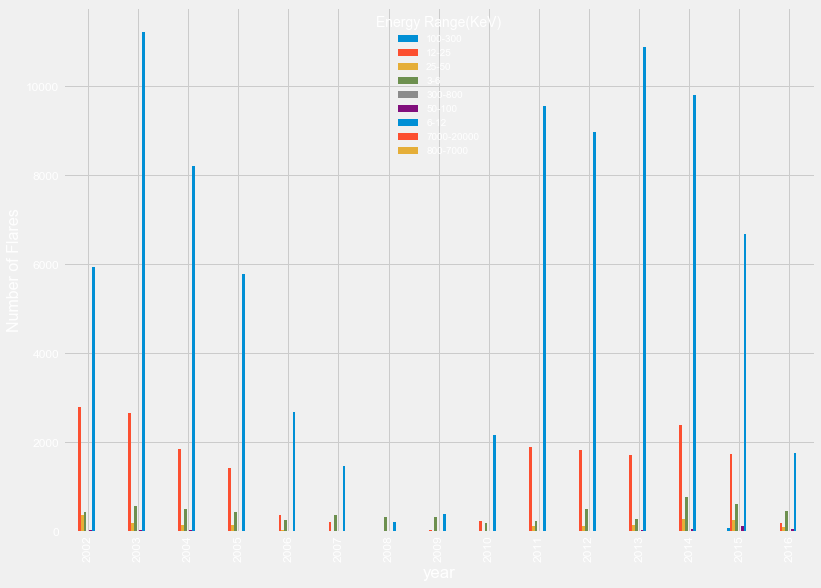

In [31]:
plt.style.use('fivethirtyeight')
new_df.groupby(['year'])['energy_kev'].value_counts().unstack().plot(kind='bar')
plt.ylabel('Number of Flares', fontsize=16)
plt.legend(title='Energy Range(KeV)', loc='best', prop={'size': 10})

## 11 Year cycle confirmed for all energies from the above barplot

# Predicting solar flare energy range from the given dataset

##  Data Preprocessing

In [32]:
predicting_df = df.copy(deep=True)

predicting_df['dt.start'] = predicting_df[['start.date','start.time']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
predicting_df['dt.peak'] = predicting_df[['start.date','peak']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
predicting_df['dt.end'] = predicting_df[['start.date','end']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
# clean columns
predicting_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)
# add new columns
predicting_df['year'] = predicting_df['dt.start'].apply(lambda col: col.year)
predicting_df['month'] = predicting_df['dt.start'].apply(lambda col: col.month)
predicting_df['day'] = predicting_df['dt.start'].apply(lambda col: col.day)

In [33]:
# Display columns
predicting_df.columns

Index(['flare', 'duration.s', 'peak.c/s', 'total.counts', 'energy.kev',
       'x.pos.asec', 'y.pos.asec', 'radial', 'active.region.ar', 'flag.1',
       'flag.2', 'flag.3', 'flag.4', 'flag.5', 'duration_s_log', 'flare_log',
       'dt.start', 'dt.peak', 'dt.end', 'year', 'month', 'day'],
      dtype='object')

In [34]:
# Rename columns and display few rows
predicting_df = predicting_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})
predicting_df.head(3)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,...,flag_4,flag_5,duration_s_log,flare_log,date_start,date_peak,date_end,year,month,day
0,2021213,712,136,167304,12-25,592,-358,692,0,A1,...,NaN,NaN,6.568078,6.568078,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
1,2021228,288,7,9504,6-12,604,-341,694,9811,A1,...,Q1,NaN,5.662960,5.662960,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2,2021332,216,15,11448,6-12,-310,375,487,9825,A1,...,NaN,NaN,5.375278,5.375278,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13


In [35]:
# Dropping columns
predicting_df = predicting_df.drop(['flag_1', 'flag_2', 'flag_3', 'flag_4', 'flag_5', 'date_start', 'date_peak', 'date_end'], axis=1)

In [36]:
# Checking null values
predicting_df.isnull().any()

flare               False
duration_s          False
peak_c_s            False
total_counts        False
energy_kev          False
x_pos_asec          False
y_pos_asec          False
radial              False
active_region_ar    False
duration_s_log      False
flare_log           False
year                False
month               False
day                 False
dtype: bool

In [37]:
# Viewing dataframe object details
predicting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113942 entries, 0 to 113941
Data columns (total 14 columns):
flare               113942 non-null int64
duration_s          113942 non-null int64
peak_c_s            113942 non-null int64
total_counts        113942 non-null int64
energy_kev          113942 non-null object
x_pos_asec          113942 non-null int64
y_pos_asec          113942 non-null int64
radial              113942 non-null int64
active_region_ar    113942 non-null int64
duration_s_log      113942 non-null float64
flare_log           113942 non-null float64
year                113942 non-null int64
month               113942 non-null int64
day                 113942 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 12.2+ MB


In [38]:
# Enumerating energy range values from str to category
dt = predicting_df['energy_kev'].astype('category')
dict(enumerate((dt.cat.categories)))

{0: '100-300',
 1: '12-25',
 2: '25-50',
 3: '3-6',
 4: '300-800',
 5: '50-100',
 6: '6-12',
 7: '7000-20000',
 8: '800-7000'}

In [39]:
# Assigning the enumerated codes to ernegy column
predicting_df['energy_kev'] = dt.cat.codes

In [40]:
# Display dataset - Focus on the energy_kev column, the ranges have been converted to categorial values
predicting_df.head(5)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,duration_s_log,flare_log,year,month,day
0,2021213,712,136,167304,1,592,-358,692,0,6.568078,6.568078,2002,2,12
1,2021228,288,7,9504,6,604,-341,694,9811,5.662960,5.662960,2002,2,12
2,2021332,216,15,11448,6,-310,375,487,9825,5.375278,5.375278,2002,2,13
3,2021308,244,20,17400,1,-277,378,469,9822,5.497168,5.497168,2002,2,13
4,2021310,236,336,313392,2,-272,390,476,9825,5.463832,5.463832,2002,2,13


## Creating train and test set for models

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(predicting_df, test_size=0.2)

In [42]:
X_train.shape, X_test.shape

((91153, 14), (22789, 14))

In [43]:
y_train = X_train['energy_kev']
X_train = X_train.drop(['energy_kev'], axis=1)

In [44]:
y_test = X_test['energy_kev']
X_test = X_test.drop(['energy_kev'], axis=1)

# Predictions using Various models 

## Using Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)
linear_regression_score = linear_regression.score(X_test, y_test)
linear_regression_score_train = linear_regression.score(X_train, y_train)
linear_regression_score, linear_regression_score_train

(0.18748428621582058, 0.19628770702289033)

**Achieves an accuracy of 19 % for the test set** - Performs very poorly in predicting the energy range

## Using Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression().fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_score = logistic_regression.score(X_test, y_test)
logistic_regression_score_train = logistic_regression.score(X_train, y_train)
logistic_regression_score, logistic_regression_score_train

(0.78590548071437971, 0.788454576371595)

In [47]:
from sklearn import metrics
print ('\nReport on data set:')
print(metrics.classification_report(y_test, logistic_regression_predictions))
print(metrics.precision_recall_fscore_support(y_test, logistic_regression_predictions, average='micro'))


Report on data set:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        32
          1       0.64      0.17      0.26      3904
          2       0.00      0.00      0.00       393
          3       0.90      0.26      0.41      1248
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00        84
          6       0.79      0.99      0.88     17123
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.75      0.79      0.73     22789

(0.78590548071437971, 0.78590548071437971, 0.78590548071437971, None)


**Achieves an accuracy of 78.6 % for the test set**

## Using Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier().fit(X_train, y_train)
decision_tree_predictions = decision_tree_classifier.predict(X_test)
decision_tree_score = decision_tree_classifier.score(X_test, y_test)
decision_tree_score_train = decision_tree_classifier.score(X_train, y_train)
decision_tree_score, decision_tree_score_train

(0.81236561498968796, 1.0)

In [50]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, decision_tree_predictions))
print(metrics.precision_recall_fscore_support(y_test, decision_tree_predictions, average='micro'))


Report on data set:
             precision    recall  f1-score   support

          0       0.14      0.19      0.16        32
          1       0.50      0.51      0.51      3904
          2       0.11      0.14      0.12       393
          3       1.00      1.00      1.00      1248
          4       0.00      0.00      0.00         3
          5       0.12      0.14      0.13        84
          6       0.90      0.89      0.89     17123
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.82      0.81      0.81     22789

(0.81236561498968796, 0.81236561498968796, 0.81236561498968796, None)


**Achieves an accuracy of 82 % for the test set**

## Using Random Forests Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_score = random_forest_classifier.score(X_test, y_test)
random_forest_score_train = random_forest_classifier.score(X_train, y_train)
random_forest_score, random_forest_score_train

(0.86107332484970822, 0.99312145513587047)

In [52]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, random_forest_predictions))
print(metrics.precision_recall_fscore_support(y_test, random_forest_predictions, average='micro'))


Report on data set:
             precision    recall  f1-score   support

          0       0.17      0.06      0.09        32
          1       0.63      0.58      0.60      3904
          2       0.21      0.04      0.06       393
          3       1.00      1.00      1.00      1248
          4       0.00      0.00      0.00         3
          5       0.36      0.05      0.08        84
          6       0.90      0.94      0.92     17123
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.84      0.86      0.85     22789

(0.86094168239062707, 0.86094168239062707, 0.86094168239062707, None)


**Achieves an accuracy of 86 % for the test set**

## Using K Nearest Neighbours

In [53]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors_classifier = KNeighborsClassifier().fit(X_train, y_train)
kneighbors_predictions = kneighbors_classifier.predict(X_test)
kneighbors_score = kneighbors_classifier.score(X_test, y_test)
kneighbors_score_train = kneighbors_classifier.score(X_train, y_train)
kneighbors_score, kneighbors_score_train

(0.76141998332528849, 0.82539247199763033)

In [54]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, kneighbors_predictions))
print(metrics.precision_recall_fscore_support(y_test, kneighbors_predictions, average='micro'))


Report on data set:
             precision    recall  f1-score   support

          0       0.06      0.06      0.06        32
          1       0.45      0.42      0.43      3904
          2       0.12      0.03      0.05       393
          3       0.47      0.25      0.32      1248
          4       0.00      0.00      0.00         3
          5       0.13      0.02      0.04        84
          6       0.84      0.90      0.87     17123
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.74      0.76      0.75     22789

(0.76141998332528849, 0.76141998332528849, 0.76141998332528837, None)


**Achieves an accuracy of 76 % for the test set**

## Using Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_classifier = GradientBoostingClassifier().fit(X_train, y_train)
gradient_classifier_predictions = gradient_classifier.predict(X_test)
gradient_classifier_score = gradient_classifier.score(X_test, y_test)
gradient_classifier_score_train = gradient_classifier.score(X_train, y_train)
gradient_classifier_score, gradient_classifier_score_train

(0.86787485190223357, 0.87591192829638076)

In [56]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, gradient_classifier_predictions))
print(metrics.precision_recall_fscore_support(y_test, gradient_classifier_predictions, average='micro'))


Report on data set:
             precision    recall  f1-score   support

          0       0.22      0.06      0.10        32
          1       0.68      0.52      0.59      3904
          2       0.33      0.03      0.06       393
          3       1.00      1.00      1.00      1248
          4       0.00      0.00      0.00         3
          5       0.28      0.06      0.10        84
          6       0.89      0.96      0.93     17123
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.85      0.87      0.85     22789

(0.86787485190223357, 0.86787485190223357, 0.86787485190223357, None)


**Achieves an accuracy of 87 % for the test set**

## Using Neural Network (scikit-learn)

In [57]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,10)).fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
mlp_score = mlp_classifier.score(X_test, y_test)
mlp_score_train = mlp_classifier.score(X_train, y_train)
mlp_score, mlp_score_train

(0.75137127561542849, 0.75227364979759304)

In [58]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, mlp_predictions))
print(metrics.precision_recall_fscore_support(y_test, mlp_predictions, average='micro'))


Report on data set:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        32
          1       0.00      0.00      0.00      3904
          2       0.00      0.00      0.00       393
          3       0.00      0.00      0.00      1248
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00        84
          6       0.75      1.00      0.86     17123
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.56      0.75      0.64     22789

(0.75137127561542849, 0.75137127561542849, 0.75137127561542849, None)


**Achieves an accuracy of 75 % for the test set**

## Results and Take away from the analysis

We analysed the trend of solar flare over the years and over the various attributes such as duration, position, radial values, intensity, etc.  

Our Top 3 models' results for prediction of a energy range for a solar flare based on attributes of the flare are - 

1. Gradient Boosting Classifier - 87 % accuracy
2. Random Forests Classifier - 86 % accuracy
3. Decision Tree Classifier - 82 % accuracy